In [7]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


Решается задача сегментации подростков по их интересам. Набор данных представляет собой случайную выборку из 30 000 американских старшеклассников, у которых в 2006 году были профили в одной известной социальной сети, название которой авторы датасета не раскрывают в целях сохранения анонимности. Данные были отобраны равномерно для четырёх разных возрастов (предполагаемый год окончания школы — 2006–2009).

* gradyear — год выпуска;
* gender — пол;
* age — возраст;
* friends — число друзей в социальной сети;
* basketball, football, soccer, softball, volleyball, swimming, cheerleading, baseball, tennis, sports, cute, sex, sexy, hot, kissed, dance, band, marching, music, rock, god, church, jesus, bible, hair, dress, blonde, mall, shopping, clothes, hollister, abercrombie, die, death, drunk, drugs (переменные с пятой по сороковую) — частота встречаемости соответствующих слов в сообщениях подростка.

In [5]:
df_sns = pd.read_csv('data/snsdata.csv')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [6]:
df_sns = df_sns.iloc[:, 4:]
df_sns.shape
df_sns.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [8]:
X = df_sns.values
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
X_norm[0][0]

-0.3322172643985876

In [9]:
model_k = KMeans(n_clusters=9, random_state=42)
model_k.fit(X_norm)
model_k.inertia_

857169.1033997755

In [10]:
df_sns.loc[:, 'label_k'] = model_k.labels_
df_sns.label_k.value_counts()

0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
Name: label_k, dtype: int64

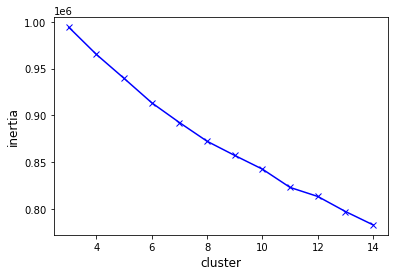

In [16]:
def get_inertia(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia
 
inertia = []
for cluster_num in range(3, 15):
    inertia.append(get_inertia(cluster_num, X_norm))
 
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
plt.plot([i for i in range(3, 15)], inertia, 'xb-')

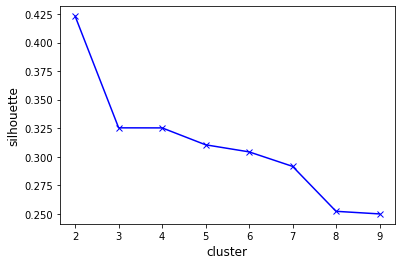

In [12]:
def get_silhouette(cluster_num, df):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(df)
    silhouette = silhouette_score(df, k_means.labels_, metric='euclidean')
    return silhouette
from sklearn.metrics import silhouette_score
silhouettes = []
for i in range(2, 10):
    silhouettes.append(get_silhouette(i ,X_norm))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouettes, 'xb-')

In [18]:
for label, group in df_sns.groupby('label_k'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    print(means.head(10))

music       0.543619
god         0.310748
dance       0.212218
hair        0.184597
shopping    0.167150
band        0.156366
rock        0.153721
soccer      0.149906
cute        0.146854
church      0.134697
dtype: float64
hair      3.258065
sex       2.604301
music     2.183871
kissed    1.758065
die       1.291398
rock      1.120430
drugs     1.067742
god       0.936559
dance     0.933333
drunk     0.810753
dtype: float64
blonde      327.0
sex          22.0
hair         12.0
god          10.0
drunk         6.0
death         6.0
die           6.0
football      2.0
dress         2.0
rock          1.0
dtype: float64
dance       1.206682
music       1.093318
shopping    1.016258
cute        0.971715
hair        0.775278
mall        0.727171
god         0.581960
church      0.458129
clothes     0.406236
hot         0.397996
dtype: float64
hollister      1.513514
abercrombie    1.164512
shopping       0.928320
music          0.923619
hair           0.916569
dance          0.698002
mall  

In [33]:
model_g = GaussianMixture(n_components=3, random_state=42)
predictions = model_g.fit_predict(X_norm)
np.unique(predictions, return_counts=True)

(array([0, 1, 2], dtype=int64), array([23426,  6573,     1], dtype=int64))

In [54]:
a = np.where(predictions == 2)
# df_sns.iloc[a].drop(['basketball', 'football', 'soccer', 'softball', 'volleyball', 'cheerleading', 'baseball', 'tennis', 'sports',
#                      'hot', 'kissed', 'marching', 'music', 'mall'], axis=1)
df_sns.iloc[a][['sex', 'blonde', 'bible', 'dress', 'hair', 'mall']]

,sex,blonde,bible,dress,hair,mall
14187,22,327,0,2,12,0
